In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


In [2]:
train_data = pd.read_csv('./data/train.csv', index_col='index')
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [3]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [4]:
train_data.isnull().sum().sum()

0

In [5]:
train_data['voted'].value_counts()/train_data.shape[0]

2    0.546824
1    0.453176
Name: voted, dtype: float64

<AxesSubplot:xlabel='voted', ylabel='count'>

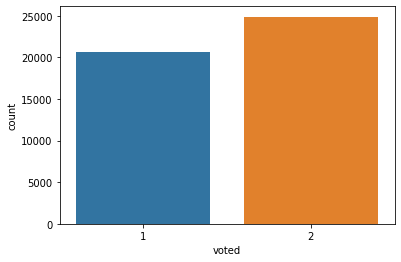

In [6]:
sns.countplot(x='voted', data=train_data)

Q_A 질문들의 응답분포와 voted의 값별로 지문들의 응답 분포 시각화
1. 동의하지 않는다.
2. 약간 동의한다.
3. 보통
4. 약간 동의한다.
5. 동의한다.

In [7]:
Q_A = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA',
       'QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']
train_data[Q_A].head()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
index,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0


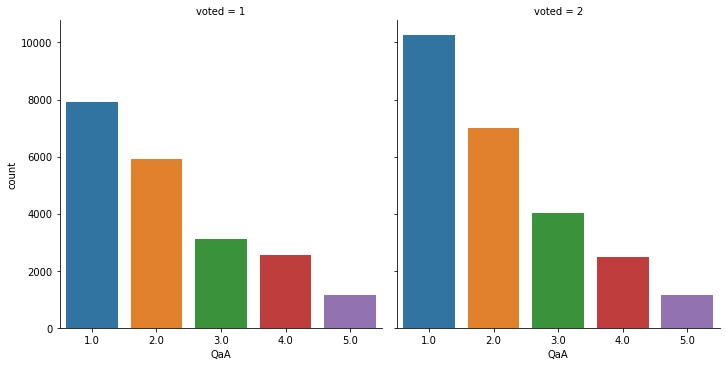

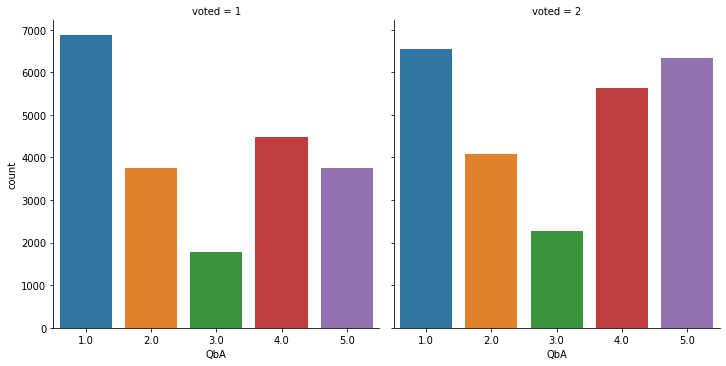

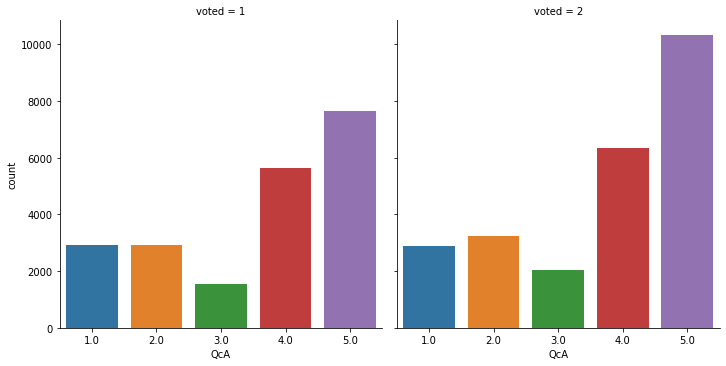

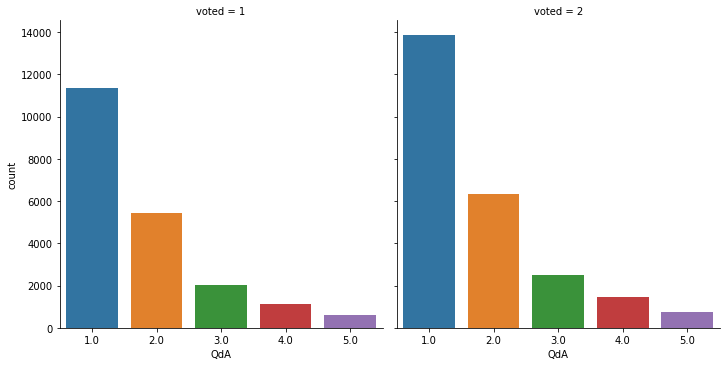

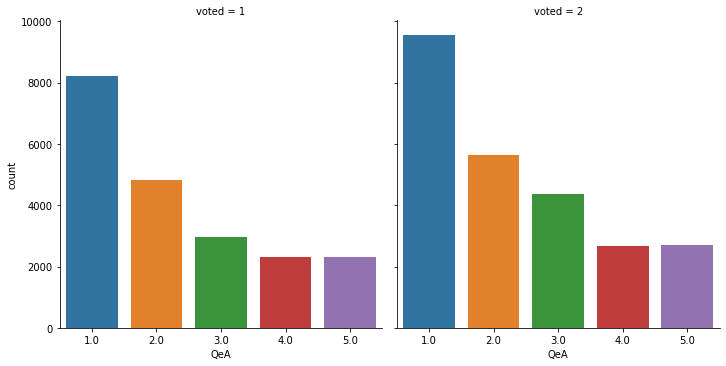

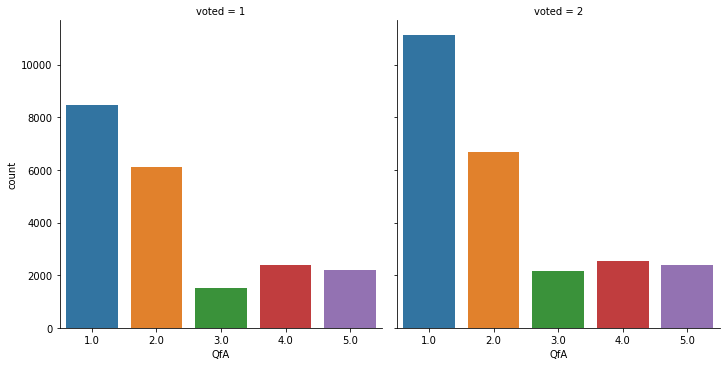

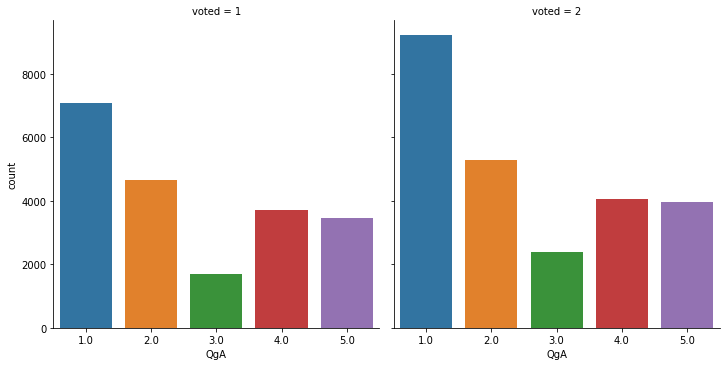

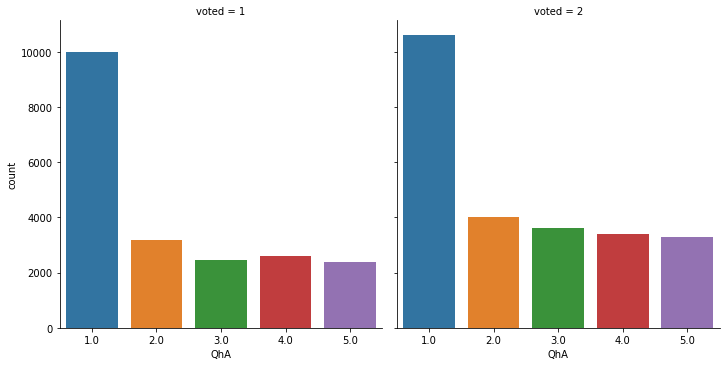

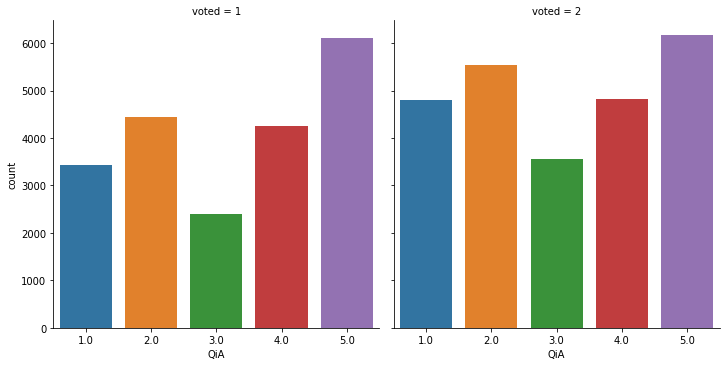

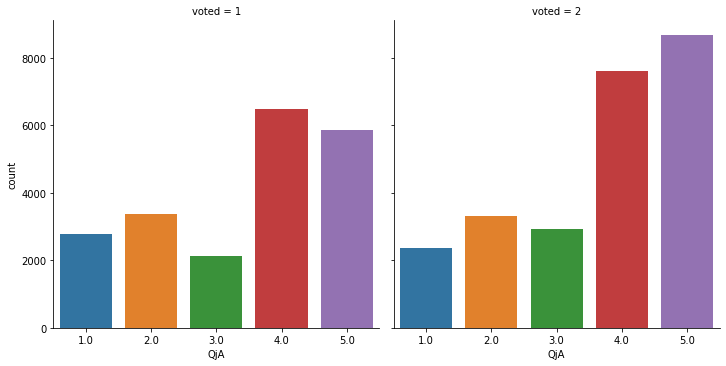

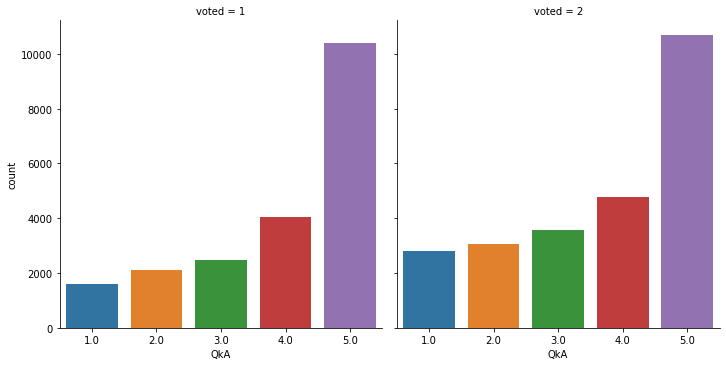

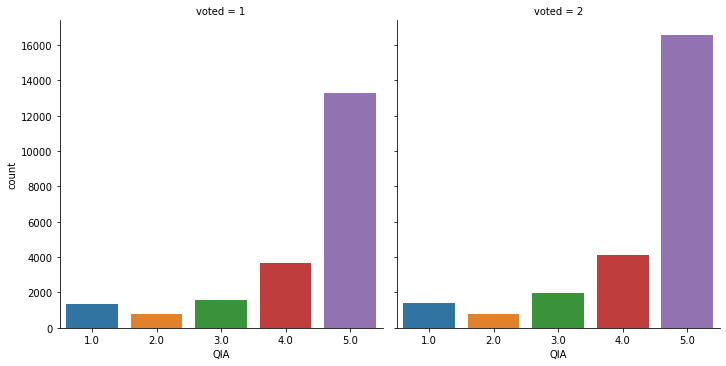

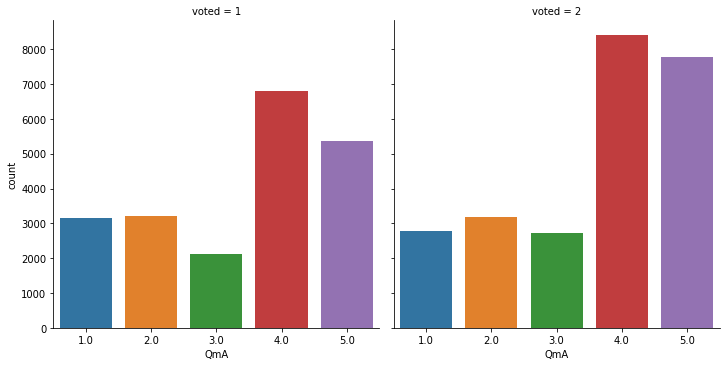

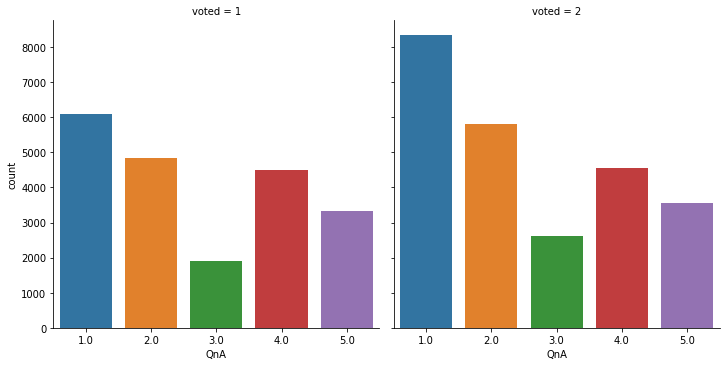

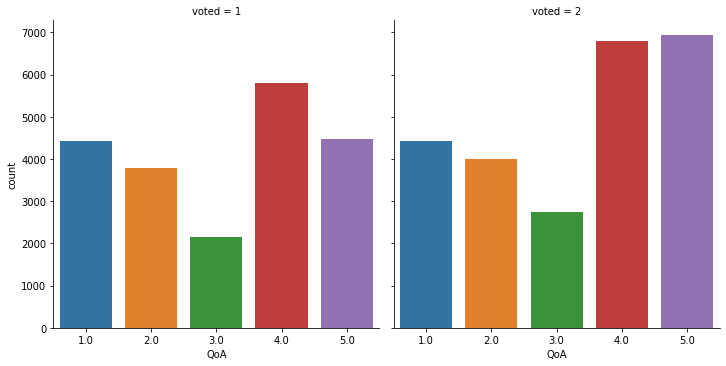

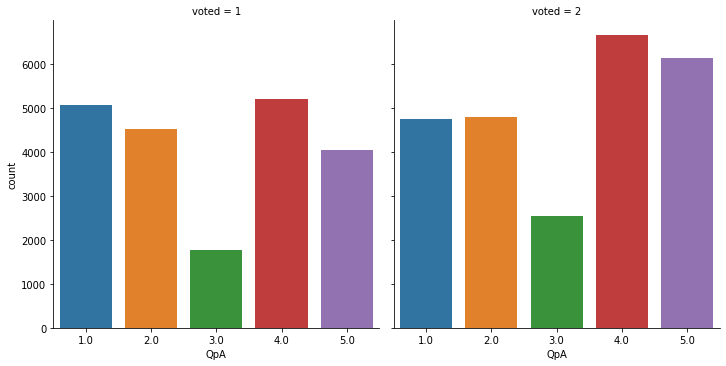

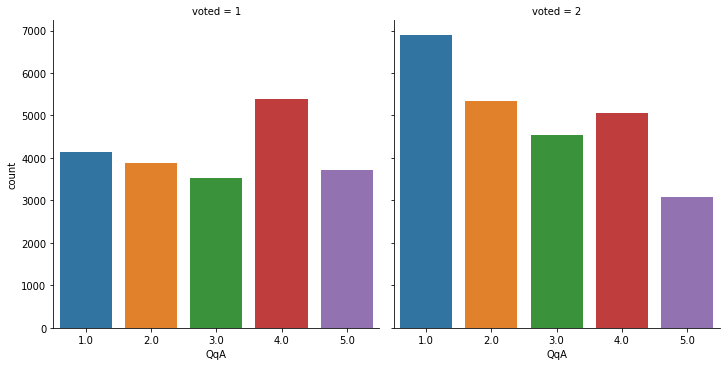

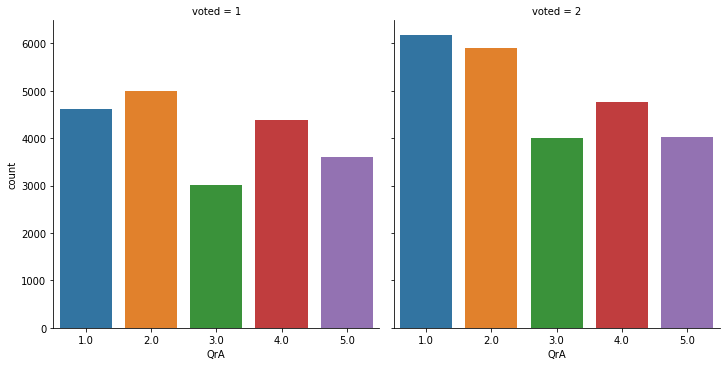

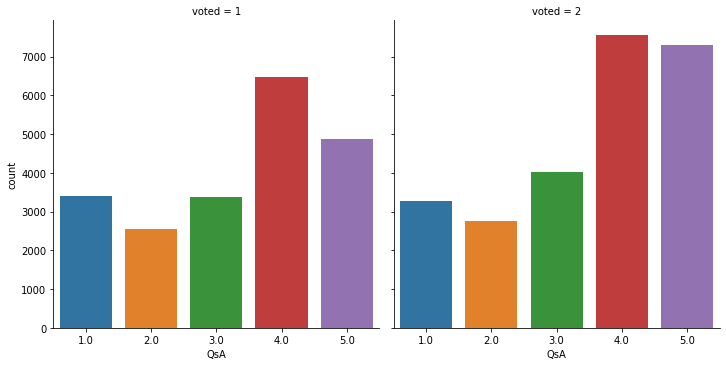

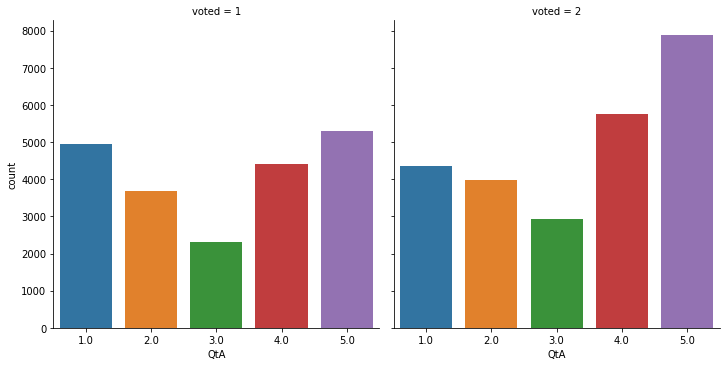

In [8]:
for column in Q_A:
    sns.catplot(x=column, col='voted', data=train_data, kind='count')

Q_A 컬럼들의 분포모양이 voted = 1일 때랑 voted = 2일 때랑 큰 차이가 없다

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [10]:
train_data.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.

familysize 컬럼에서 사분위수값의 비해 max의 값이 큰 차이가 보여 이상치일 가능성이 높아 보인다.

In [11]:
train_data['age_group'].value_counts()

10s     14215
20s     14112
30s      7836
40s      5051
50s      2889
60s      1194
+70s      235
Name: age_group, dtype: int64

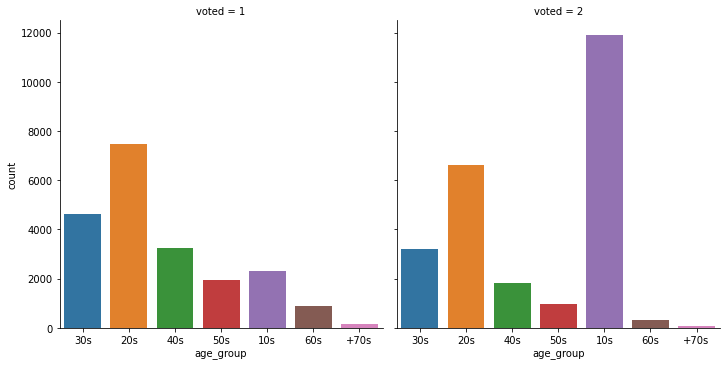

In [12]:
sns.catplot(x='age_group', col='voted', data=train_data, kind='count')

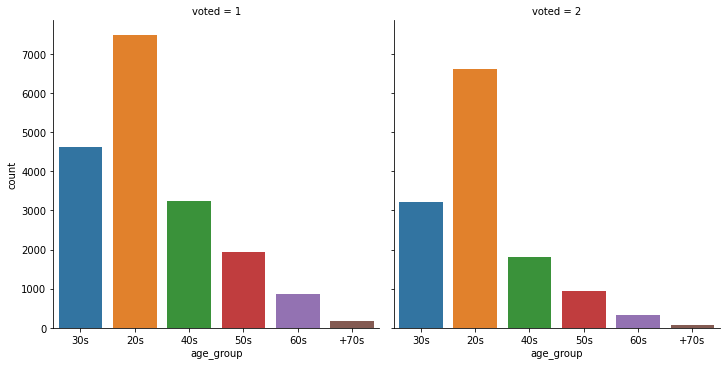

In [13]:
sns.catplot(x='age_group', col='voted', data=train_data[train_data['age_group'] != '10s'], kind='count')

age_group의 컬럼에서는 10대에서 큰 차이를 보여주고, 10대를 제외한 값에서는 voted=2보다는 voted=1이 높다

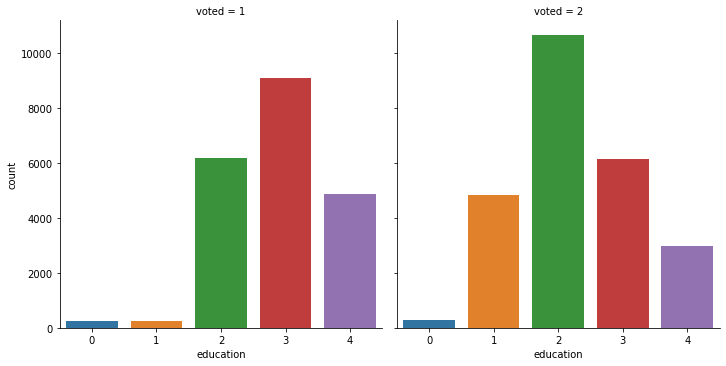

In [14]:
sns.catplot(x='education', col='voted', data=train_data, kind='count')

education 컬럼
- 1(고등학교 이하), 2(고등학교)의 데이터에서는 voted=2의 값이 높다
- 3(대학교), 4(대학원)의 데이터에서는 voted=1의 값이 높다
- 0(무응답)은 차이가 없다

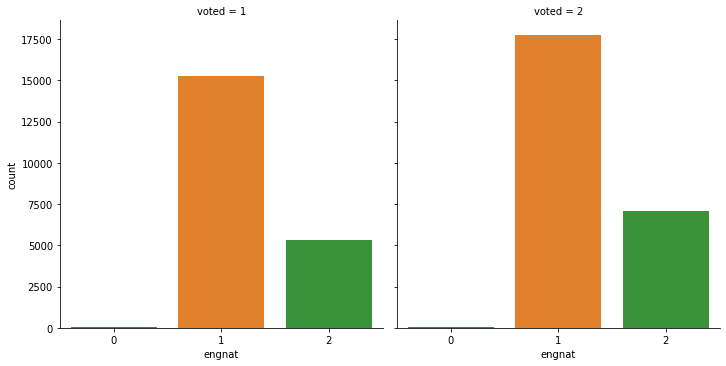

In [15]:
sns.catplot(x='engnat', col='voted', data=train_data, kind='count')

angnat컬럼은 큰 차이가 없다

In [16]:
train_data['familysize'].value_counts()

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
16                2
20                2
999               1
100               1
34                1
18                1
2147483647        1
30                1
Name: familysize, dtype: int64

In [17]:
train_data = train_data[train_data['familysize'] != 2147483647]

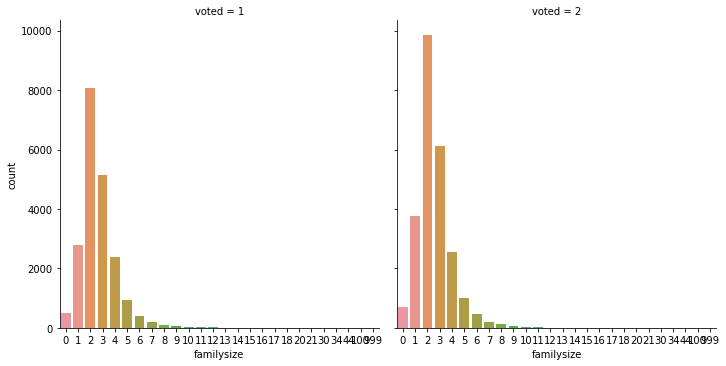

In [18]:
sns.catplot(x='familysize', col='voted', data=train_data, kind='count')

In [19]:
train_data.loc[(train_data['familysize'] > 10), 'familysize'] = train_data['familysize'].median()

In [20]:
train_data['familysize'].value_counts()

2.0     18023
3.0     11256
1.0      6535
4.0      4907
5.0      1962
0.0      1217
6.0       838
7.0       387
8.0       221
9.0       126
10.0       59
Name: familysize, dtype: int64

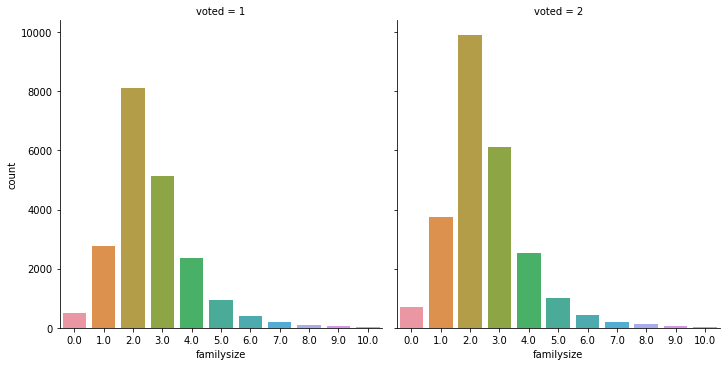

In [21]:
sns.catplot(x='familysize', col='voted', data=train_data, kind='count')

familysize 컬럼에서는 가족수가 2명에서 voted=2가 조금 높다

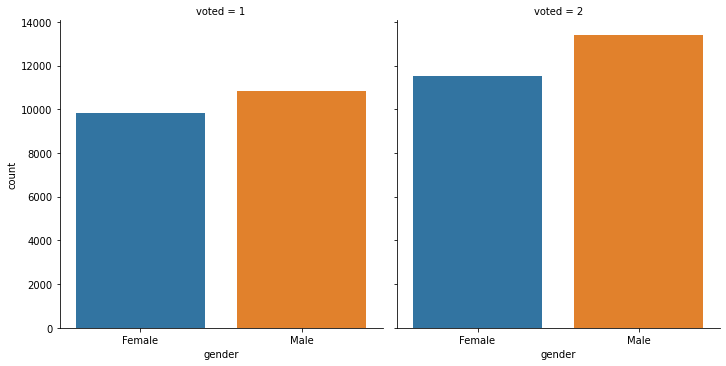

In [22]:
sns.catplot(x='gender', col='voted', data=train_data, kind='count')

gender컬럼은 차이가 없다

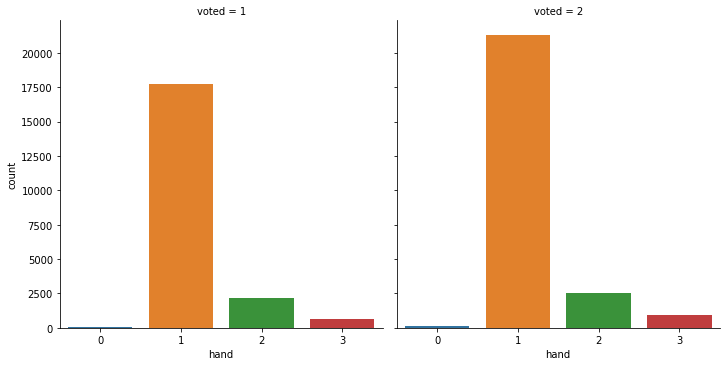

In [23]:
sns.catplot(x='hand', col='voted', data=train_data, kind='count')

hand 컬럼은 차이가 없다

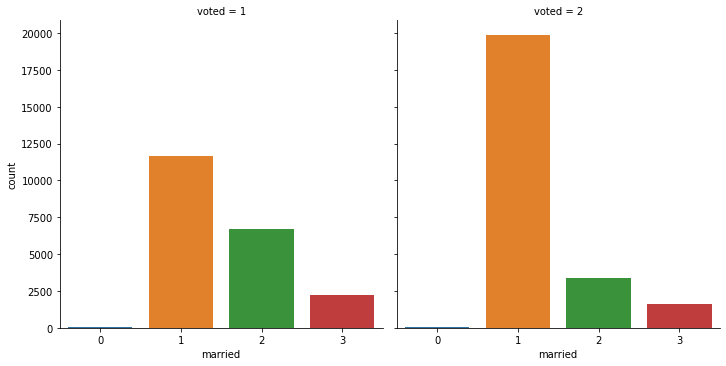

In [24]:
sns.catplot(x='married', col='voted', data=train_data, kind='count')

married 컬럼은 1(미혼)일 때 voted = 2가 voted = 1일 때보다 다른 값에 비해 많이 높다

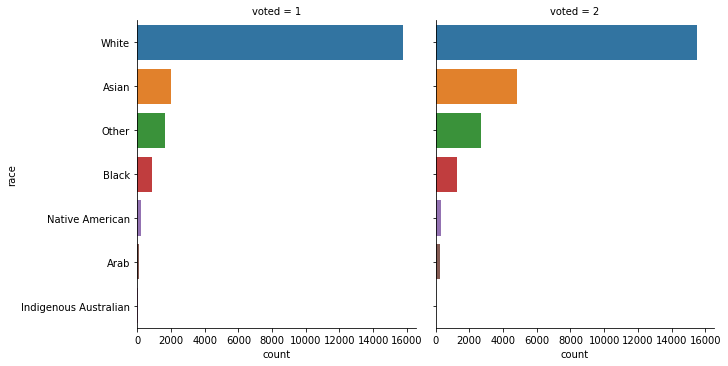

In [25]:
sns.catplot(y='race', col='voted', data=train_data, kind='count')

차이가 없는것으로 보인다

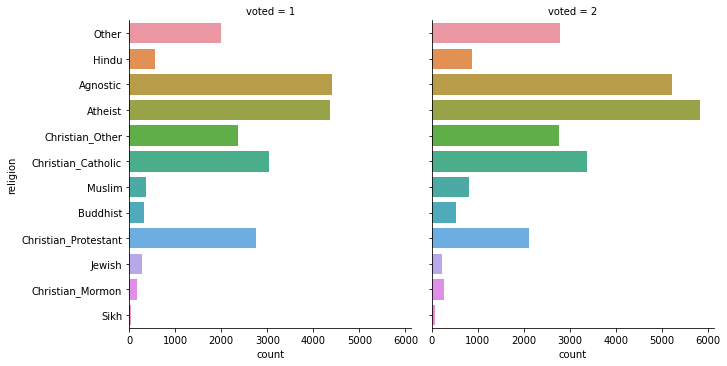

In [26]:
sns.catplot(y='religion', col='voted', data=train_data, kind='count')

religion 컬럼에서 voted = 1일 때는 Agnostic, Atheist의 값이 비슷하지만 voted = 2일 때는 Atheist의 값이 좀 더 많다

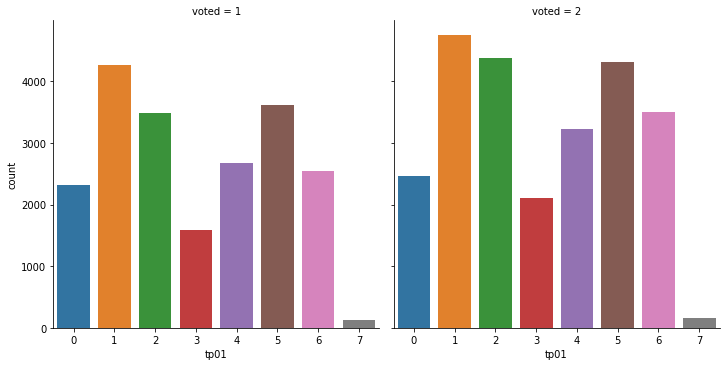

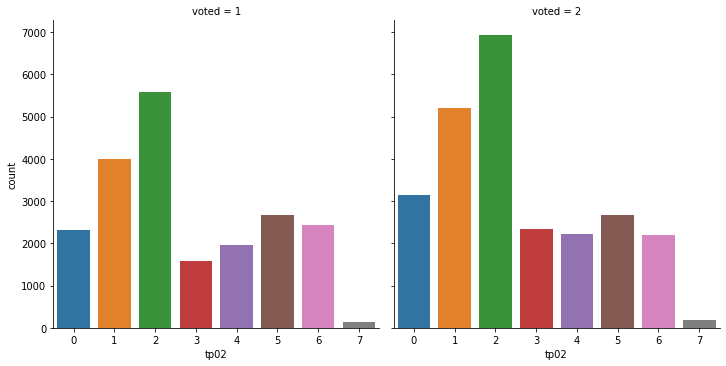

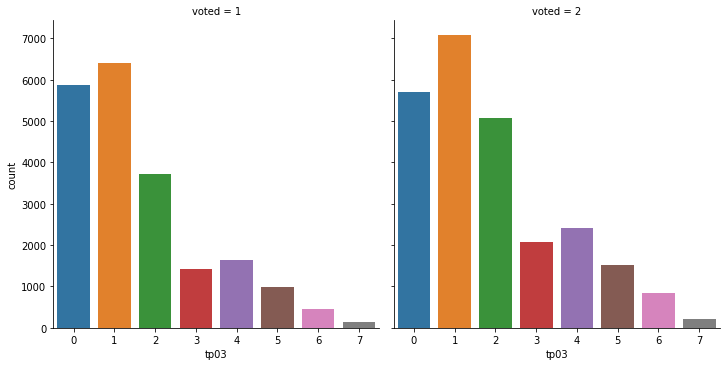

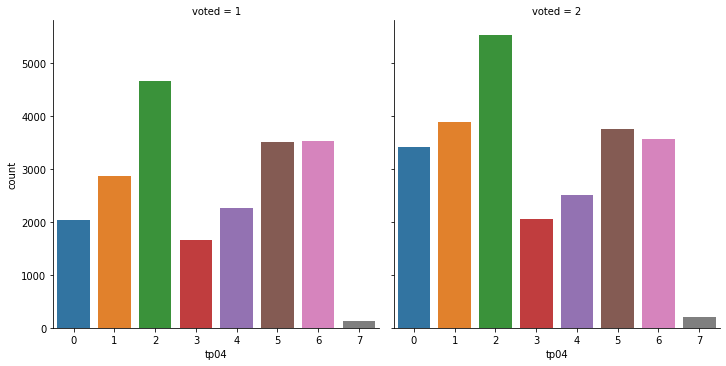

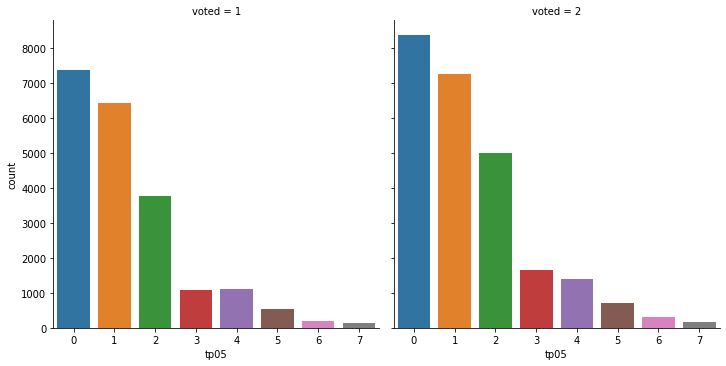

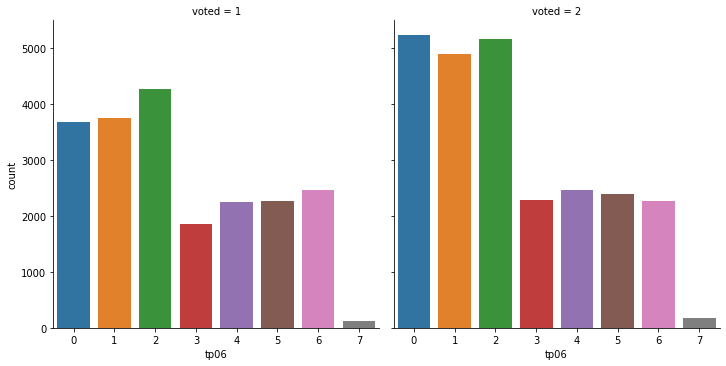

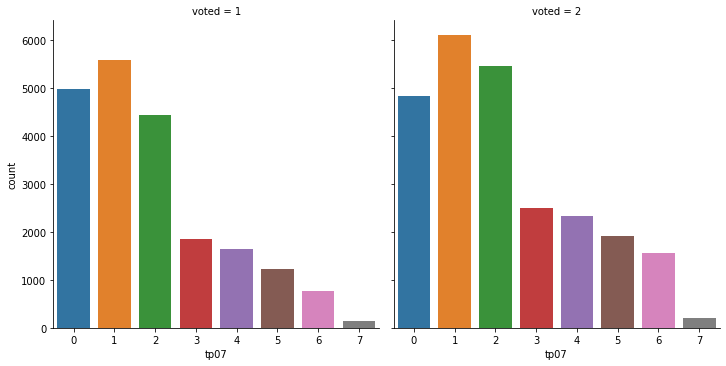

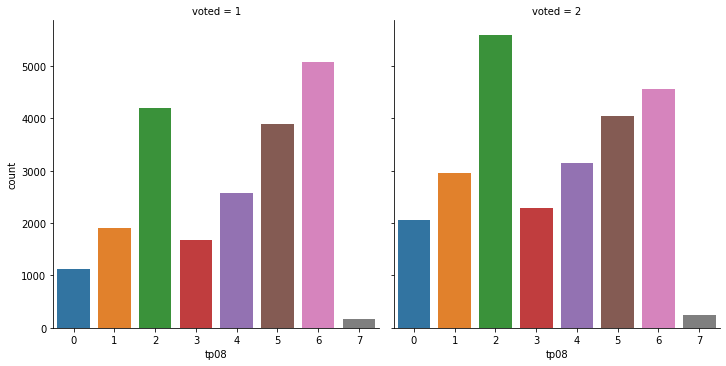

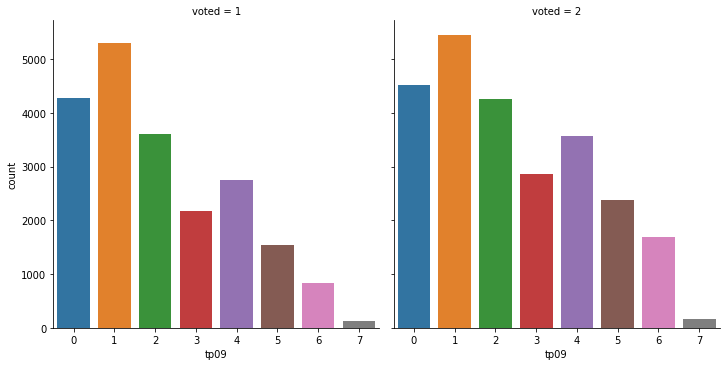

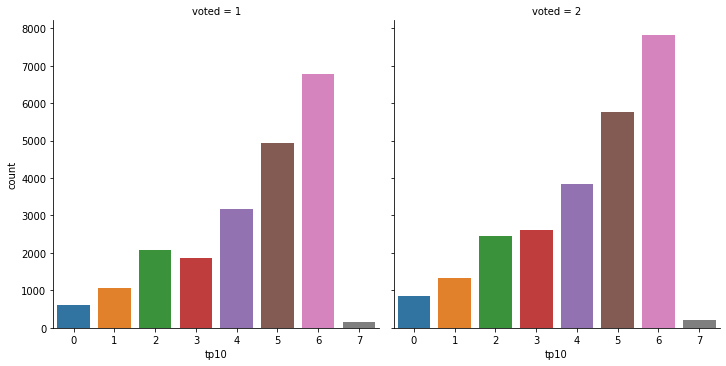

In [27]:
tp_columns = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
for column in tp_columns:
    sns.catplot(x=column, col='voted', data=train_data, kind='count')

tp컬럼들은 차이가 큰 차이가 없다

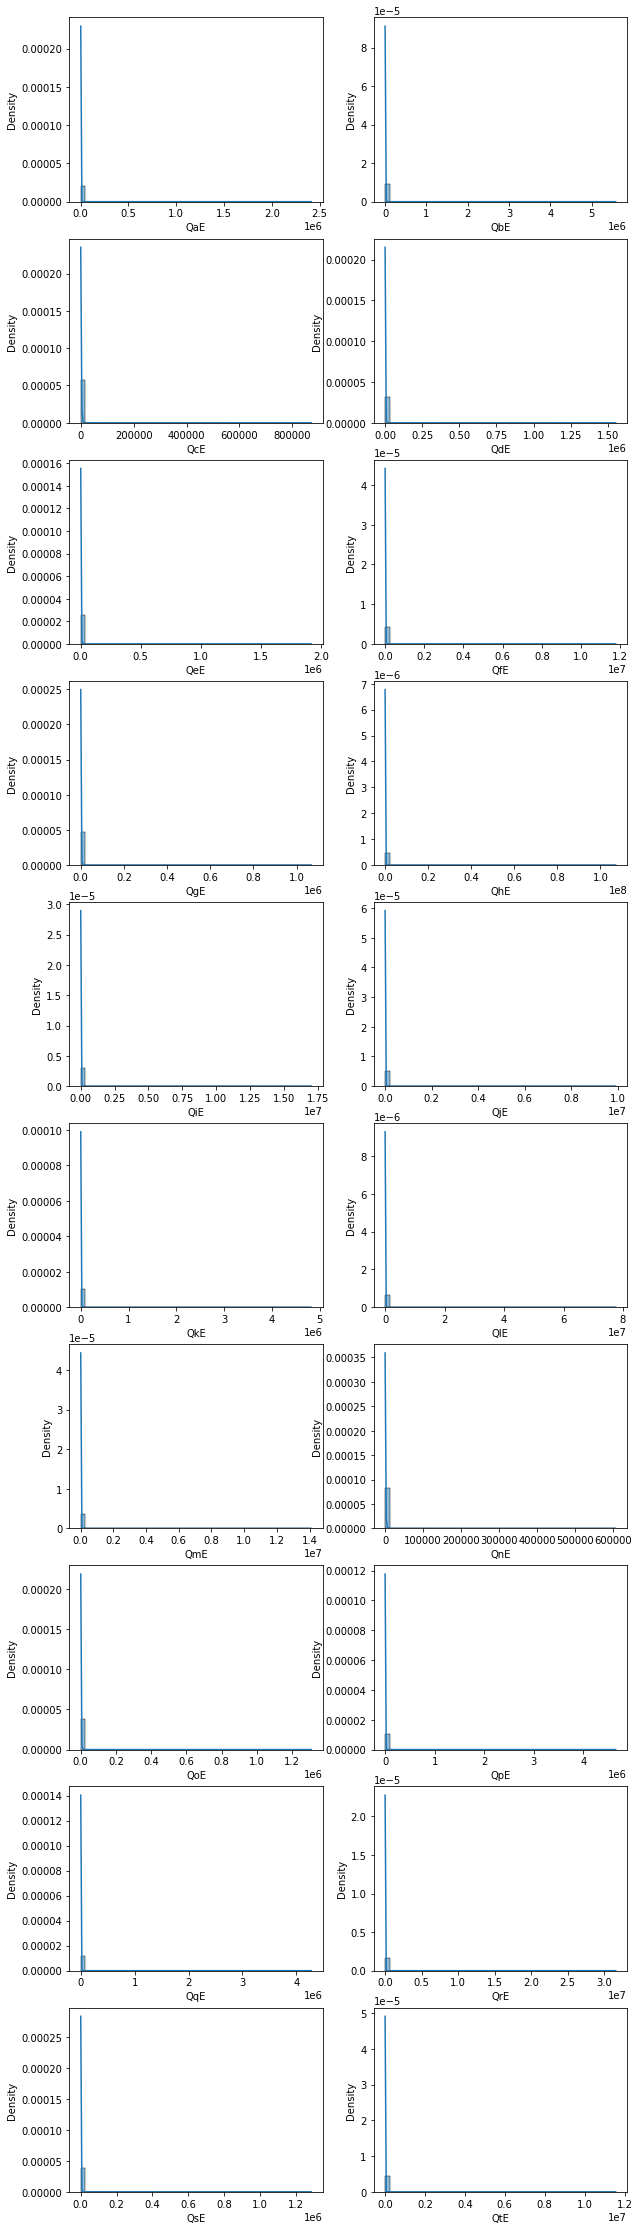

In [28]:
Q_E = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE',
       'QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']
fig, axs = plt.subplots(figsize=(10,40), nrows=10, ncols=2, squeeze=False)
idx = 0
for row in range(0,10):
    for col in range(0,2):
        sns.histplot(x=Q_E[idx], data=train_data, stat='density', kde=True, bins = 50, ax=axs[row][col])
        idx += 1

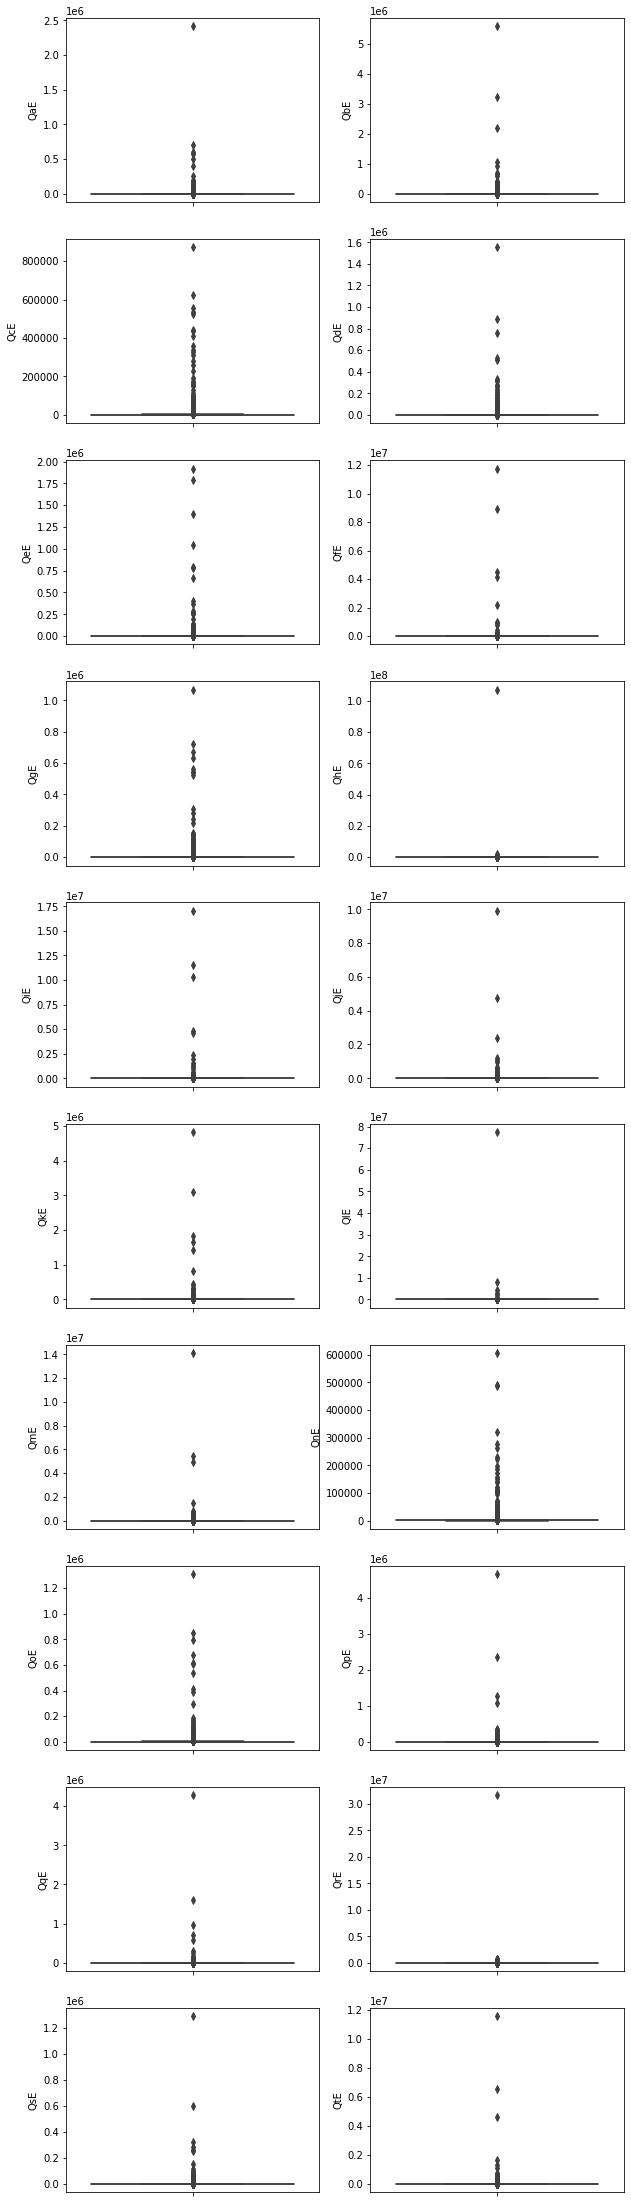

In [29]:
fig, axs = plt.subplots(figsize=(10,40), nrows=10, ncols=2, squeeze=False)
idx = 0
for row in range(0,10):
    for col in range(0,2):
        sns.boxplot(y=Q_E[idx], data=train_data, ax=axs[row][col])
        idx += 1

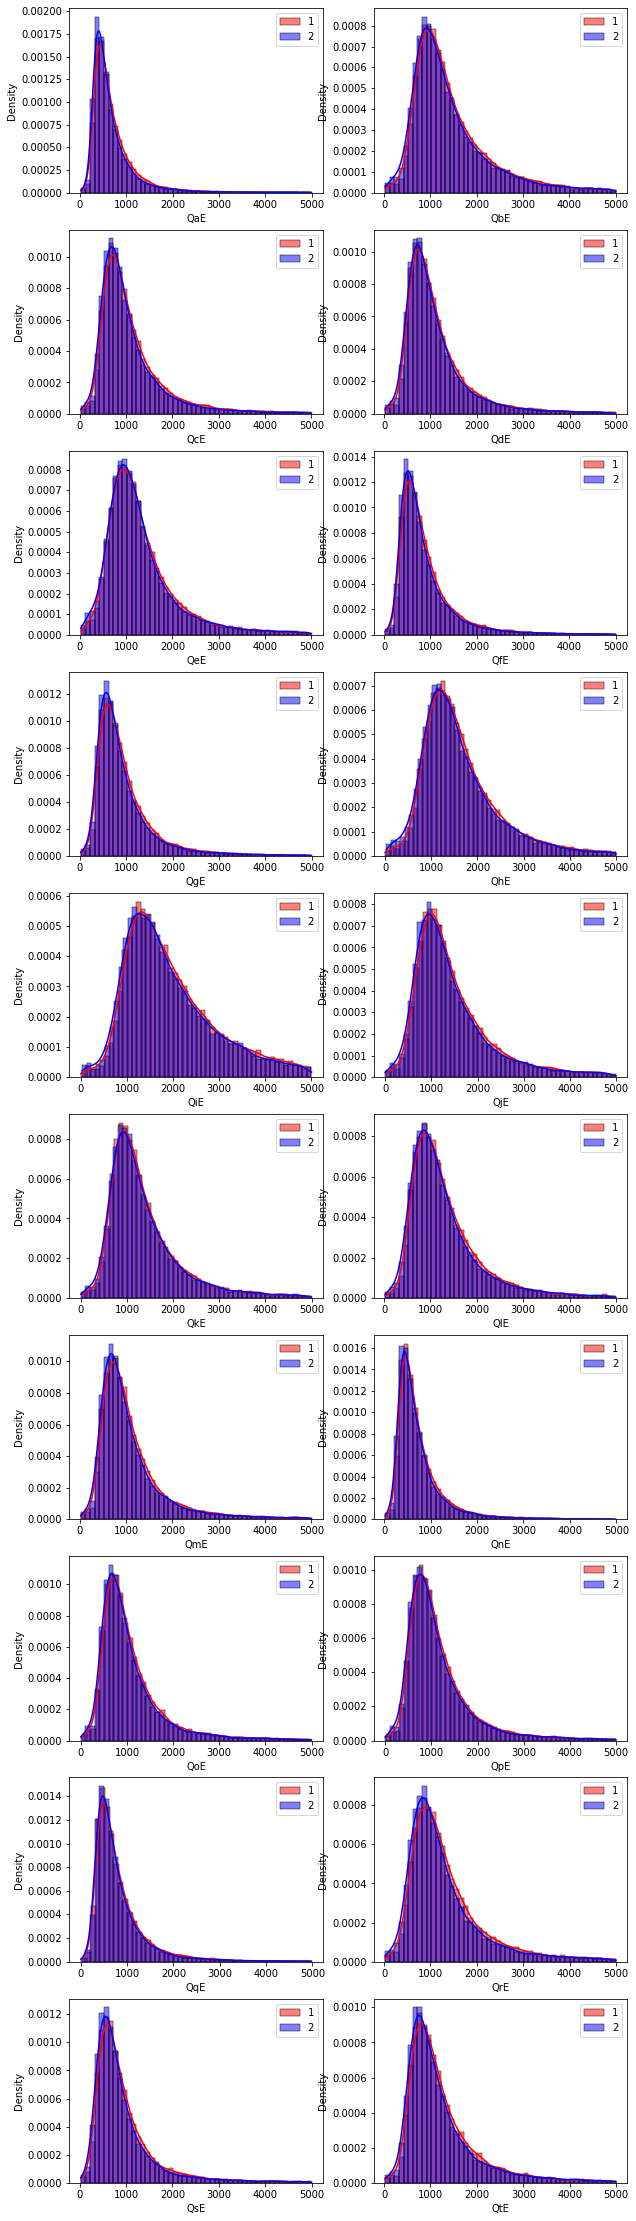

In [30]:
fig, axs = plt.subplots(figsize=(10,40), nrows=10, ncols=2, squeeze=False)
idx = 0
voted_1 = (train_data['voted'] == 1)
voted_2 = (train_data['voted'] == 2)
for row in range(0,10):
    for col in range(0,2):
        sns.histplot(x=Q_E[idx], data=train_data[(voted_1) & (train_data[Q_E[idx]] < 5000)], stat='density', kde=True, bins=50, color='red', label='1', ax=axs[row][col])
        sns.histplot(x=Q_E[idx], data=train_data[(voted_2) & (train_data[Q_E[idx]] < 5000)], stat='density', kde=True, bins=50, color='blue', label='2', ax=axs[row][col])
        axs[row][col].legend()
        idx += 1

질문에 대한 응답시간으로는 확인하기 힘든것으로 보인다

In [31]:
train_data['urban'].value_counts()

2    18534
3    17767
1     8908
0      322
Name: urban, dtype: int64

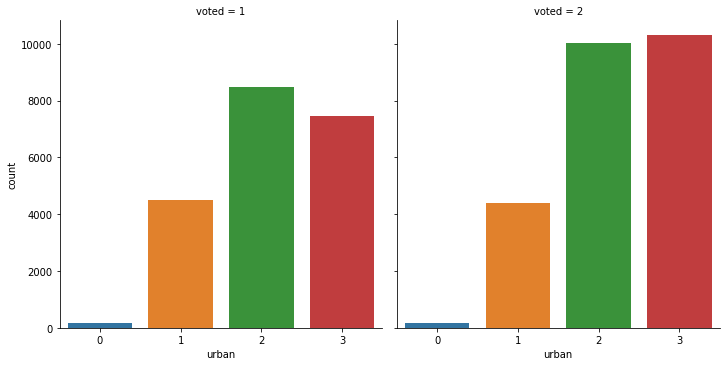

In [32]:
sns.catplot(x='urban', col='voted', data=train_data, kind='count')

urban컬럼은 voted = 1에서는 2(교외)가 3(도시)보다 높으며, voted = 2에서는 반대이다

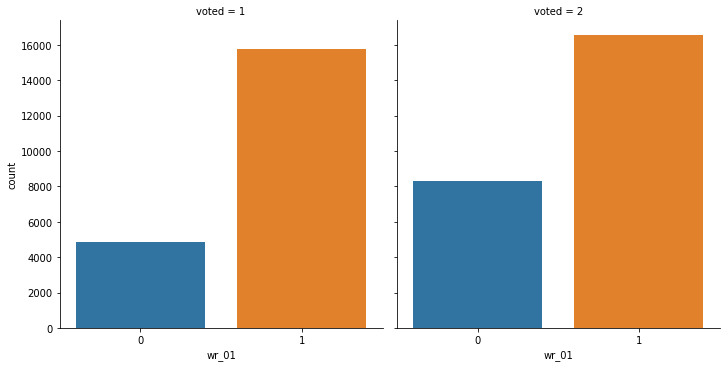

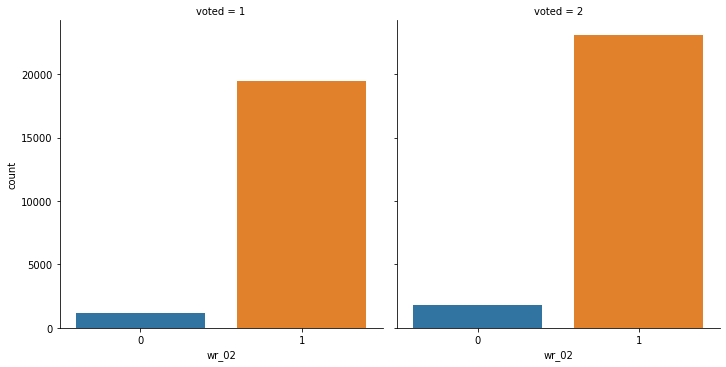

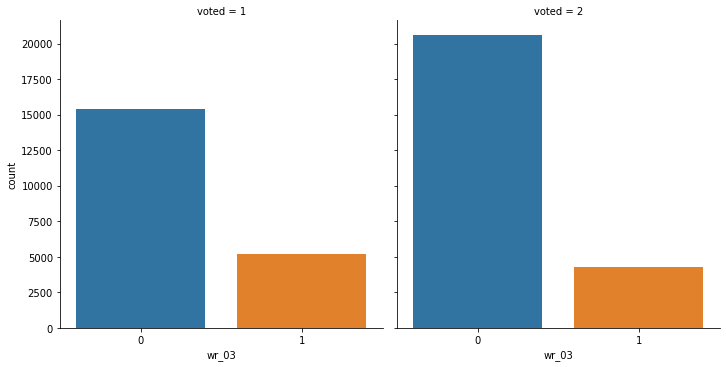

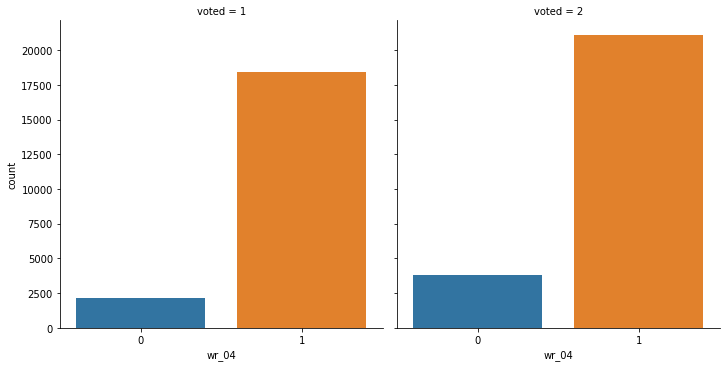

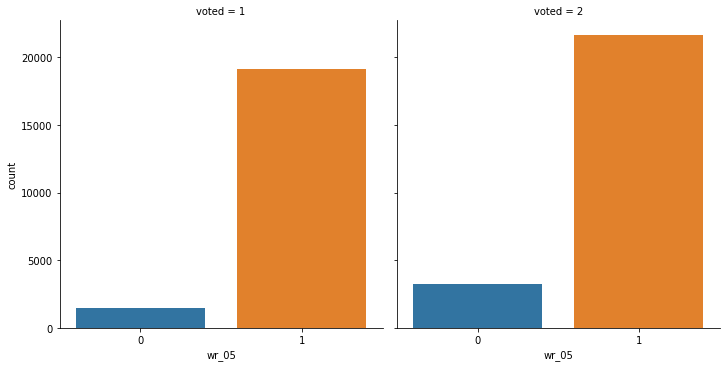

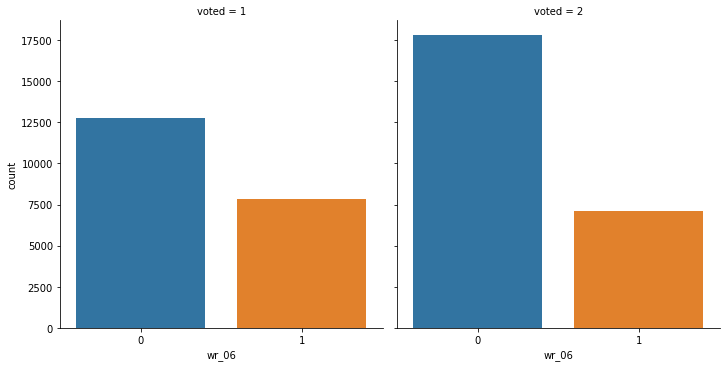

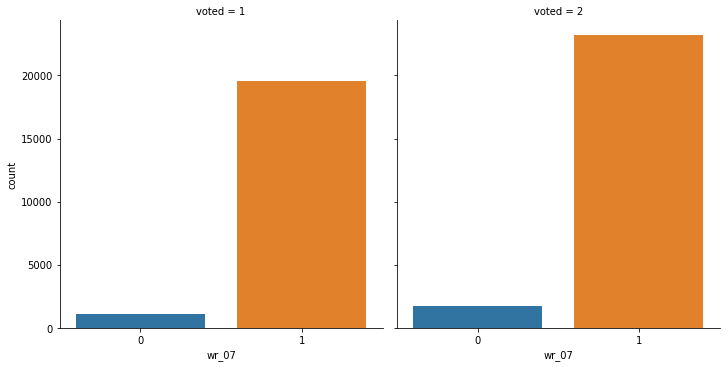

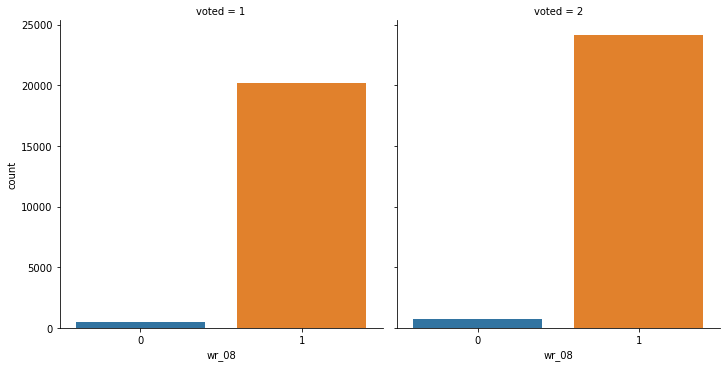

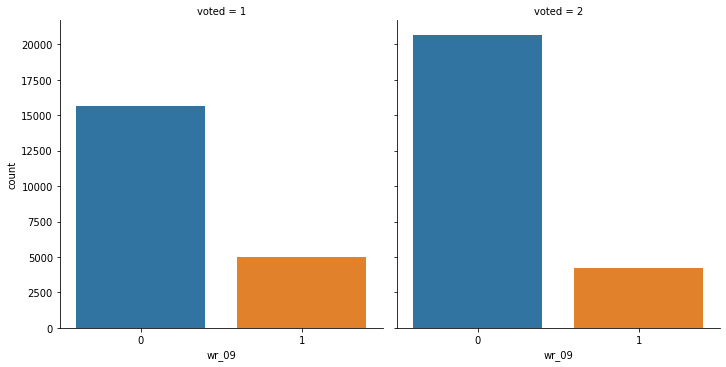

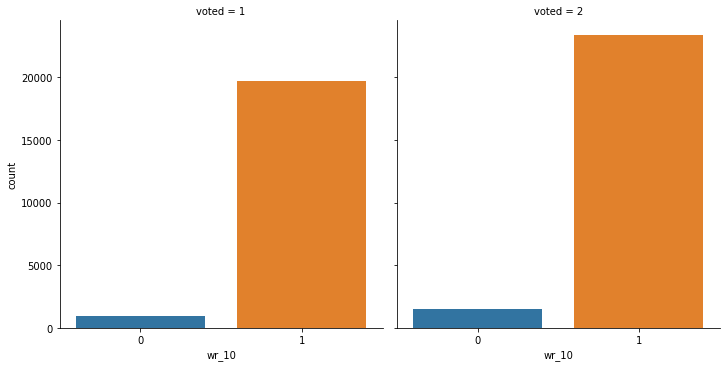

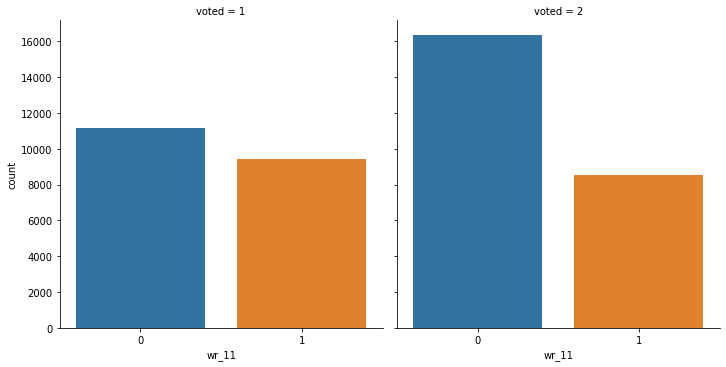

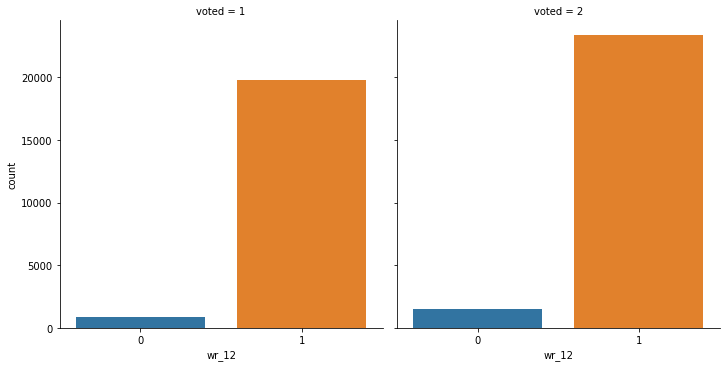

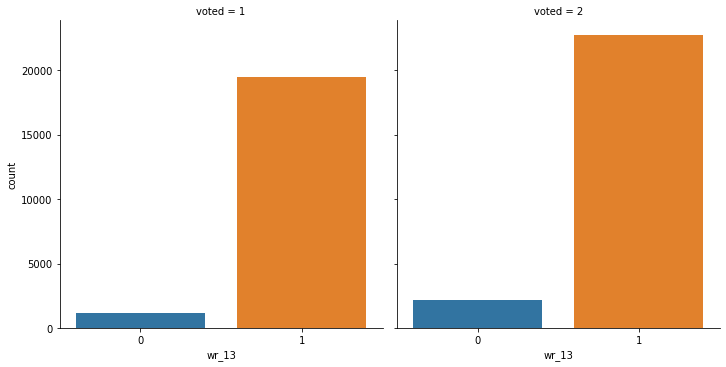

In [40]:
wr_columns = ['wr_01','wr_02','wr_03','wr_04','wr_05','wr_06','wr_07',
             'wr_08','wr_09','wr_10','wr_11','wr_12','wr_13']
for column in wr_columns:
    sns.catplot(x=column, col='voted', data=train_data, kind='count')

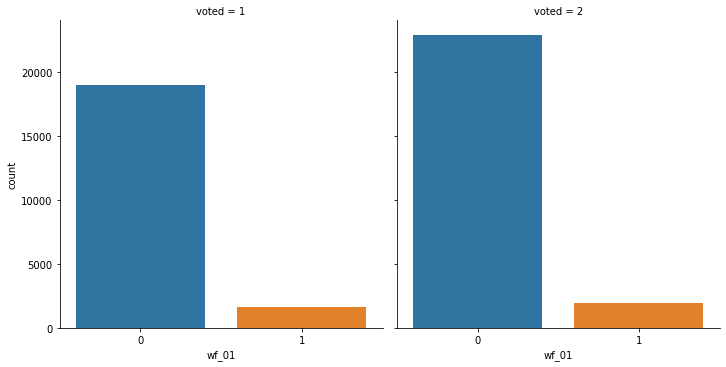

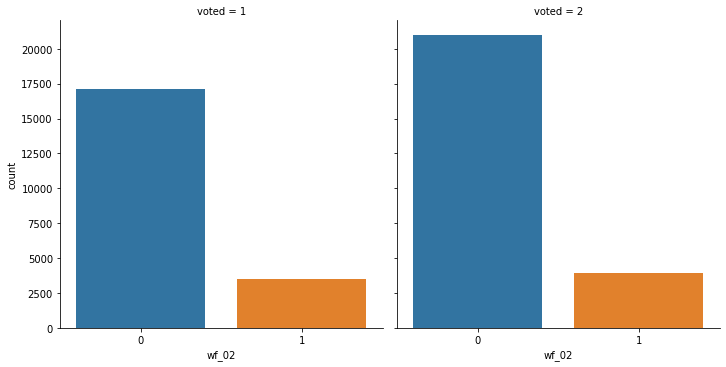

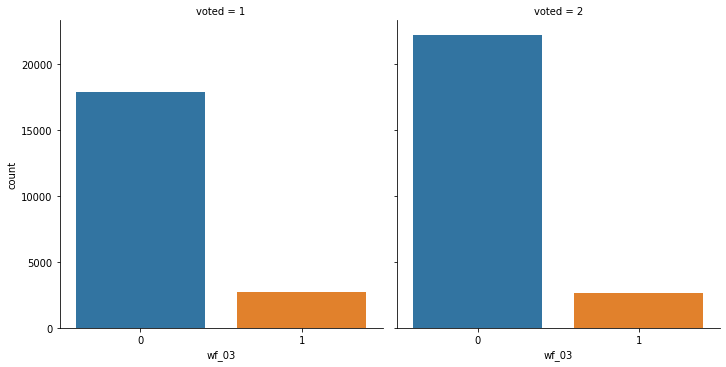

In [41]:
wf_columns = ['wf_01','wf_02','wf_03']
for column in wf_columns:
    sns.catplot(x=column, col='voted', data=train_data, kind='count')